# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 3: Uso de Atropy y Pandas con bases de datos.

**Objetivos:**

1. Abrir y graficar de forma clara un archivo FITS.
2. Trabajar con Pandas para el manejo de una gran base de datos.
3. Conocer sobre los exoplanetas que se han descubierto.


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.


##Astropy y FITS

##1. Abrir un FITS con Astropy y sacar información de su header

La primera parte de esta minitarea consiste en descargar un nuevo archivo `FITS` desconocido. Usando lo que aprendimos en clases, debemos sacar información importante de su header.

Para comenzar, debes descargar el archivo `FITS`  dado y luego, abrirlo usando el módulo `fits` de  `Astropy` para guardalo en una variable llamada hdu:

In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.utils.data import download_file
import numpy as np

archivo = download_file("https://github.com/astrodatos/Clase3/raw/master/lsc1m005-kb69-20160621-0111-e91.fits.fz", cache=True )
hdu = fits.open(archivo)

Como comentamos en clases, no existe un estandar universal sobre los header provenientes de distintos telescopios. **En este caso particular, la información del fit no vive en `hdu[0]`, sino que en `hdu[1]`.**

In [0]:
print(hdu.info())

Filename: /root/.astropy/cache/download/py3/a01c803c4997037bcc23c9d47d4803ac
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  SCI           1 CompImageHDU    264   (2028, 2028)   float32   
  2  CAT           1 BinTableHDU     59   51R x 24C   [D, D, D, D, K, K, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, D]   
  3  BPM           1 CompImageHDU     10   (2028, 2028)   uint8   
None


Ahora, debes inspeccionar el header. Llámalo (sin un print, porque sale hacia el lado) para ver que forma tiene el diccionario: sus llaves (keys) y valores asignados. 

In [0]:
# Invocar el header

header_data = hdu[1].header
header_data

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2028 / width of table in bytes                        
NAXIS2  =                 2028 / number of rows in table                        
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
EXTNAME = 'SCI     '                                                            
DATADICV= 'LCOGT-DIC.FITS-0.11.0' / Version number of the data dictionary       
HDRVER  = 'LCOGT-HDR-1.4.0'    / Version number of the headers                  
ORIGIN  = 'LCOGT   '           / Organization responsible for the data          
SITEID  = 'lsc     '        

Debes identificar las llaves que contengan información acerca de: 
1. objeto astronómico que se observó.
2. qué filtro se usó.
3. la fecha de la observación.
4. desde qué observatorio. 

Para completar los siguientes print,  primero debes crear una variable para cada uno de los datos que necesitamos y guardar la información directamente desde el header, habiendo ya identificado el `key` del diccionario donde vive cada información.

In [0]:
# Crea 4 variables para guardar la información del header requerida. Recuerda que no sirve leer a ojo el valor y escribirlo.
# Debe ser asignado usando los beneficios de ser un array, de la forma genérica: header["key"]

objeto = header_data["OBJECT"] 
observatorio = header_data["SITE"]
fecha = header_data["DATE"]
filtro = header_data["FILTER"]
#Creo las variables 

In [0]:
print("Se observó el siguiente objeto astronómico:", objeto)
print("Se utilizó el filtro:", filtro)
print("La fecha es:", fecha)
print("Se observó desde el observatorio:", observatorio)
#Ocupo la parte anterior para printear la info que necesito.

Se observó el siguiente objeto astronómico: M84
Se utilizó el filtro: V
La fecha es: 2016-06-22
Se observó desde el observatorio: LCOGT node at Cerro Tololo Inter-American Observatory


##Resumen Parte 1

Básicamente invoco el header y creo variables gracias a lo anterior, y posteriormente las ocupo para imprimir la información como que filtro se usó, etc.

##2. Mostrar la imagen con imshow

La segunda parte de esta actividad consiste en mostrar la imagen con imshow y modificarla para que se vea más bonita. 

Primero, debes asignar en la variable `imagen` la compenente del header que contiene la matriz que forma la imagen astronómica. Recuerda que en este fits específico, el header y la imagen viven en `hdu[1]`.

In [0]:
imagen = hdu[1].data
print(imagen)

[[409.76544 387.59427 402.07248 ... 440.72897 356.21777 434.76215]
 [443.78912 371.28482 339.09955 ... 342.3912  346.6121  364.93365]
 [320.9006  396.30795 410.93542 ... 321.0883  327.98666 320.21524]
 ...
 [290.43112 347.46127 323.3732  ... 303.02054 377.46143 334.18552]
 [362.6835  333.03574 362.91675 ... 358.27798 345.49887 403.336  ]
 [365.18445 337.01416 386.51413 ... 381.4594  325.97586 370.07693]]


Vamos a importar un módulo de `matplotlib` que nos permitirá cambiar la escala de colores de la imagen, como por ejemplo, a una logaritmica. 

Ahora, debes completar el siguiente bloque de código para mostrar la imagen que viene en este fit.

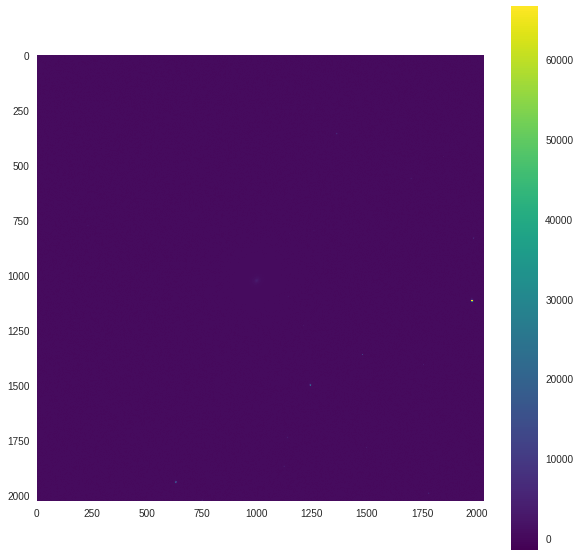

In [0]:
from matplotlib.colors import LogNorm
plt.figure(figsize=(10,10))
plt.imshow(imagen, cmap='viridis') 
plt.colorbar()


# El siguiente comando hará que no se vean las líneas sobre la imagen
plt.grid(b=None)

Se supone que en esta imagen deberíamos ver una galaxia en el centro, sin embargo, casi no se ve nada. Esto ocurre cuando la escala de colores no es la correcta. Para utilizar una escala logarítmica por ejemplo, debes agregar el siguiente argumento a la función imshow(): `norm = LogNorm()`.

Plotea nuevamente el gráfico, pero ahora con la escala logarítmica.

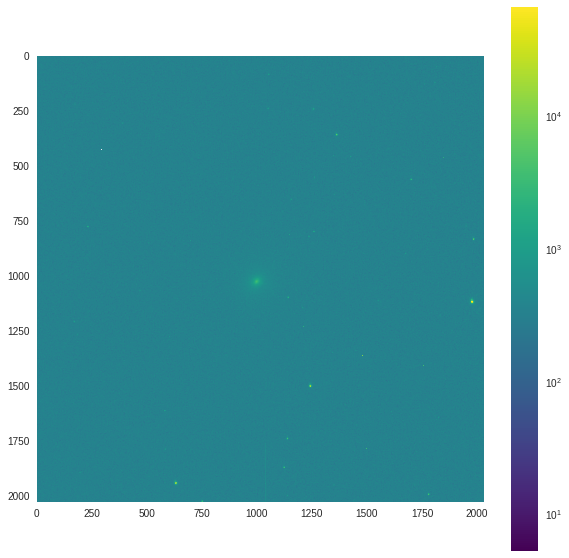

In [0]:
# Plot acá
plt.figure(figsize=(10,10))
plt.imshow(imagen, cmap='viridis',norm=LogNorm())
plt.colorbar()
plt.grid(b=None)

Ahora se observa una pequeña zona más brillante en el centro: es una galaxia! Sin embargo, nos gustaría verla más de cerca. Como la imagen es una matriz de valores, lo que debes hacer a continuación es un slicing de los datos para seleccionar un cuadrado.

**HINT** El slicing en una matriz de hace de la forma `array[inicio_fila:fin_fila,inicio_columna:fin_columna]`. Si necesitan más ayuda, google es su mejor amigo :)

Luego de tener el cuadrado que contiene la imagen, debes plotearla con escala logarítmica de colores.

(2028, 2028)


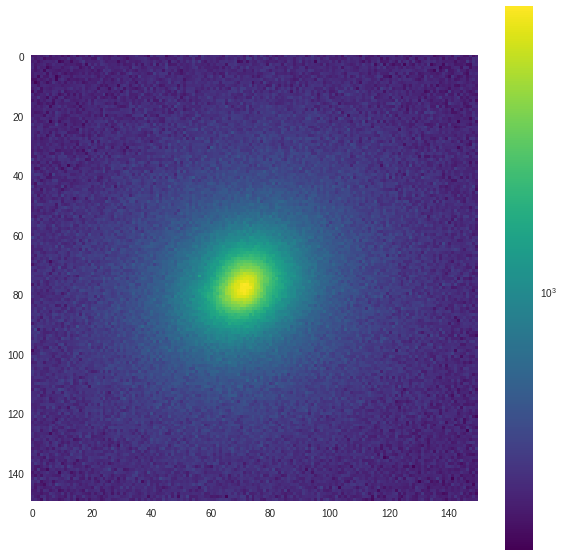

In [0]:
# Slicing del cuadrado con la galaxia y plot acá
print(imagen.shape)
imagen2 = imagen[950:1100,925:1075]
plt.figure(figsize=(10,10))
plt.imshow(imagen2, cmap='viridis',norm=LogNorm())
plt.colorbar()
plt.grid(b=None)


## Acércate we...

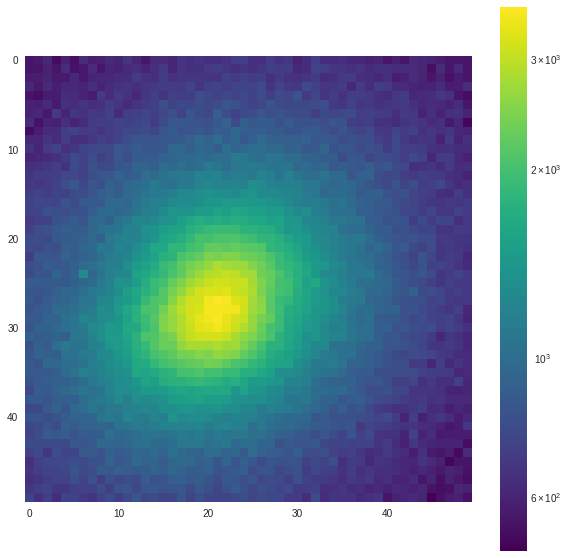

In [0]:
  

imagen3 = imagen[1000:1050,975:1025]
plt.figure(figsize=(10,10))
plt.imshow(imagen3, cmap='viridis',norm=LogNorm())
plt.colorbar()
plt.grid(b=None)

### Un poco más we..

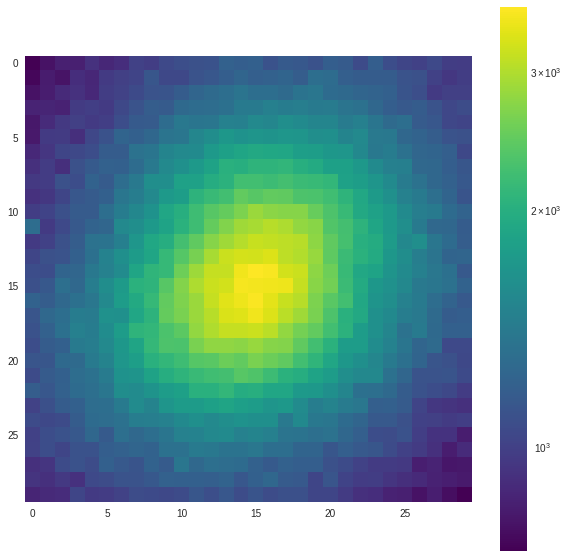

In [0]:

imagen4 = imagen[1013:1043,981:1011]
plt.figure(figsize=(10,10))
plt.imshow(imagen4, cmap='viridis',norm=LogNorm())
plt.colorbar()
plt.grid(b=None)

### Un poquito más we...

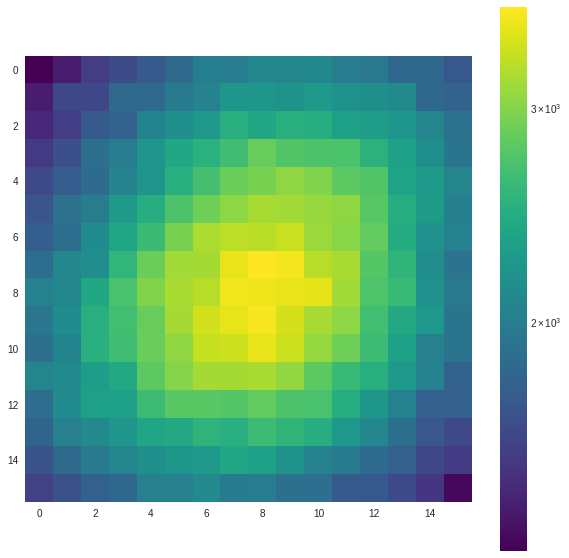

In [0]:
#opcional. Más zoom xd
imagen5 = imagen[1020:1036,988:1004]
plt.figure(figsize=(10,10))
plt.imshow(imagen5, cmap='viridis',norm=LogNorm())
plt.colorbar()
plt.grid(b=None)

### Te hice perder el tiempo xdxdxd, saludos :3 meper donas¿... Pero te dejo este meme -que acabo de crear- por llegar aquí :).
![uwu](https://memegenerator.net/img/instances/84281963/dime-la-definicin-de-verla-ms-de-cerca.jpg)

##Pandas y bases de datos

##3. Graficando exoplanetas con Pandas

En la Clase 3 aprendimos que la librería `Pandas` es muy útil para trabajar con bases de datos. En esta sección, volveremos a trabajar con la base de datos de Exoplanetas, sacada de NASA Exoplanet Archive, la cual contiene más de 3900 exoplanetas confirmados con sus respectivos parámetros planetarios y estelares.

Para conocer las columnas que contiene esta base de datos, pueden abrir el archivo en sus computadores y analizar las primeras líneas que empiezan con #, o también llamar al método `.columns` de un Data Frame.

**HINT** Las columnas más importantes/útiles del archivo planets.csv con su respectiva descripción y unidades, son:
- pl_hostname:    Host Name
- pl_name:        Planet Name
- pl_discmethod:  Discovery Method
- pl_pnum:        Number of Planets in System
- pl_orbper:      Orbital Period [days]
- pl_orbsmax:     Orbit Semi-Major Axis [AU])
- pl_orbeccen:    Eccentricity
- pl_orbincl:     Inclination [deg]
- pl_bmassj:      Planet Mass or M*sin(i) [Jupiter mass]
- pl_radj:        Planet Radius [Jupiter radii]
- ra_str:         RA [sexagesimal]
- ra:             RA [decimal degrees]
- dec_str:        Dec [sexagesimal]
- dec:            Dec [decimal degrees]
- st_dist:        Distance [pc]
- pl_eqt:         Equilibrium Temperature [K]
- pl_massj:       Planet Mass [Jupiter mass]
- pl_masse:       Planet Mass [Earth mass]
- pl_rade:        Planet Radius [Earth radii]
- pl_disc:        Year of Discovery


En esta sección se pide graficar ***de forma clara***, todos los exoplanetas en Masa vs Período, donde el color represente su método de detección. Sugerimos usar máscaras de array para separar los planetas según su método de detección en distintos Data Frame, para luego graficarlos. Recuerden agregar leyendas en el plot donde se explique que significan los colores.


In [3]:
# Importamos Pandas y cargamos el archivo planets.csv
import pandas as pd

archivo = download_file('https://github.com/astrodatos/Clase3/raw/master/planets.csv')
planetas = pd.read_csv(archivo, comment="#")


In [0]:
planetas.head()

tecnicas = planetas["pl_discmethod"]
astrometry = planetas[tecnicas == "Astrometry"]
eclipse_timing_variations = planetas[tecnicas == "Eclipse Timing Variations"]         
imaging = planetas[tecnicas == "Imaging"]                       
microlensing = planetas[tecnicas == "Microlensing"]                      
orbital_brightness_modulation = planetas[tecnicas == "Orbital Brightness Modulation"]        
pulsar_timing = planetas[tecnicas == "Pulsar Timing"]                      
pulsation_timing_variations = planetas[tecnicas == "Pulsation Timing Variations"]      
radial_velocity = planetas[tecnicas == "Radial Velocity"]                     
transit = planetas[tecnicas == "Transit"]                            
transit_timing_variations = planetas[tecnicas == "Transit Timing Variations"]

#Creo variables para cada uno de los descubrimientos.

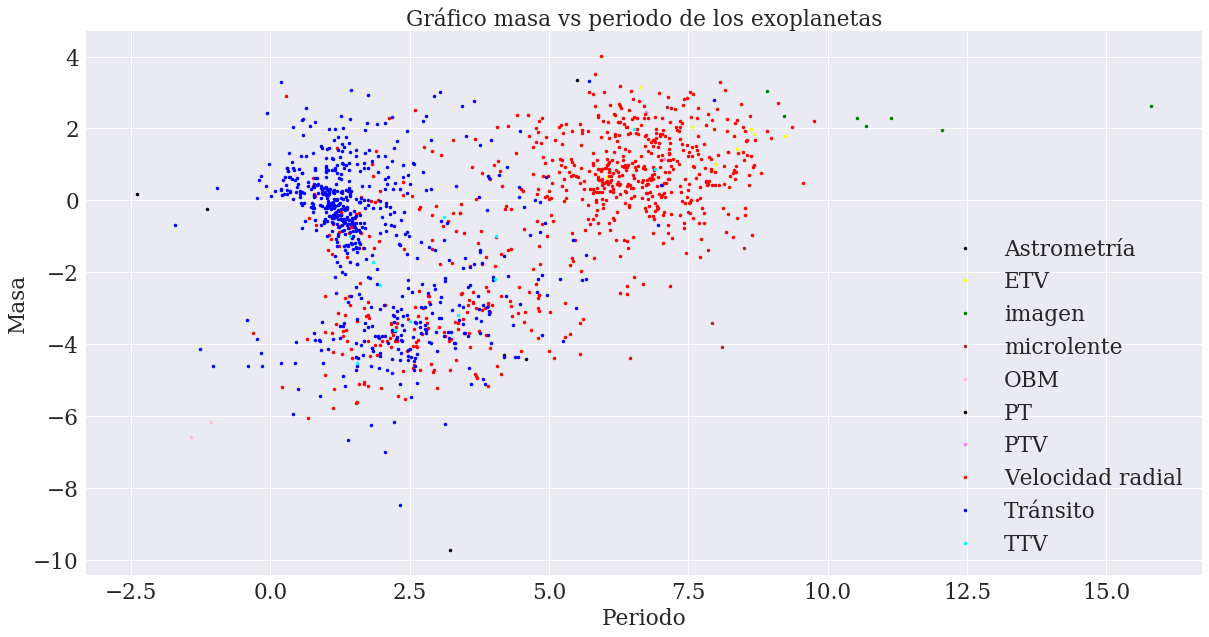

In [5]:
#Graficar plot
from matplotlib.pyplot import rcParams
plt.rc('font', family='serif',size=15)
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
rcParams.update(params)

plt.figure(figsize=(20,10))

plt.xlabel("Periodo")
plt.ylabel("Masa")
plt.title("Gráfico masa vs periodo de los exoplanetas")

plt.plot(np.log(astrometry["pl_orbper"]),np.log(astrometry["pl_bmassj"]), ".", color="black", label = "Astrometría") #Grafico los exoplanetas descubiertos por astrometría.
plt.plot(np.log(eclipse_timing_variations["pl_orbper"]),np.log(eclipse_timing_variations["pl_bmassj"]), ".", color="yellow",label = "ETV" ) #lo mismo pero con etv.
plt.plot(np.log(imaging["pl_orbper"]),np.log(imaging["pl_bmassj"]), ".", color="green", label = "imagen") #Se entiende la idea para los demás xd.
plt.plot(np.log(microlensing["pl_orbper"]),np.log(microlensing["pl_bmassj"]), ".", color="brown", label = "microlente")
plt.plot(np.log(orbital_brightness_modulation["pl_orbper"]),np.log(orbital_brightness_modulation["pl_bmassj"]), ".", color="pink", label = "OBM")
plt.plot(np.log(pulsar_timing["pl_orbper"]),np.log(pulsar_timing["pl_bmassj"]), ".", color="black", label = "PT")
plt.plot(np.log(pulsation_timing_variations["pl_orbper"]),np.log(pulsation_timing_variations["pl_bmassj"]), ".", color="violet", label = "PTV")
plt.plot(np.log(radial_velocity["pl_orbper"]),np.log(radial_velocity["pl_bmassj"]), ".", color="red", label = "Velocidad radial")
plt.plot(np.log(transit["pl_orbper"]),np.log(transit["pl_bmassj"]), ".", color="blue",label = 'Tránsito')
plt.plot(np.log(transit_timing_variations["pl_orbper"]),np.log(transit_timing_variations["pl_bmassj"]), ".", color="cyan", label = "TTV" )
plt.legend(loc = 'lower right')


##4. ¿Cuántos exoplanetas se han descubierto por año?

Realiza un histograma que muestre cuántos exoplanetas se han descubierto por año.

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 1.0, 'Histograma sobre "descubrimiento" de exoplanetas por año')

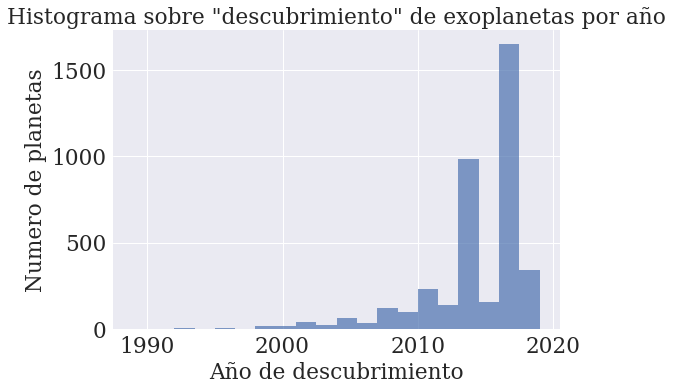

In [9]:
#Al igual que con técnicas en la parte anterior, ahora lo haré con el año de descubrimiento:
añodescubrimiento = planetas["pl_disc"]
#Luego gráfico
plt.hist(añodescubrimiento,bins = 20,alpha = 0.7) #histograma 
plt.xlabel('Año de descubrimiento') #eje x
plt.ylabel('Numero de planetas') #eje y
plt.title('Histograma sobre "descubrimiento" de exoplanetas por año') #titulo


##5. Conocer los planetas más extremos descubiertos

Les pedimos usar sus conocimientos pythonísticos, para printear la información (que ustedes consideren relevante) de los exoplanetas que cumplan con las siguientes características:
- El más lejano a la Tierra.
- El más cercano a la Tierra.
- El más grande.
- El más pequeño.

In [99]:
# Trabajen
distancias = planetas["st_dist"] 
radios = planetas["pl_rade"]
distancia_max = np.max(distancias) #Planeta más lejano
distancia_min = np.min(distancias) #planeta más cercano
radio_max = np.max(radios) #planeta más grande
radio_min = np.min(radios) #planeta más pequeño.

pl_cercanos = planetas[planetas["st_dist"] == distancia_min] #Busco el/los planeta(s) que cumpla(n) esto
pl_lejanos = planetas[planetas["st_dist"] == distancia_max] #idem
pl_grandes = planetas[planetas["pl_rade"] == radio_max] #idem
pl_chicos = planetas[planetas["pl_rade"] == radio_min] #idem


#Verifico la cantidad de filas para saber si uno o más planetas cumplen lo anterior
print(pl_lejanos.shape[0])
print(pl_cercanos.shape[0])
print(pl_grandes.shape[0])
print(pl_chicos.shape[0])



pl_maxdist = np.where(distancias == distancia_max) #Busco el indice del/los planeta(s) que cumplen esto
pl_mindist = np.where(distancias == distancia_min) #idem
pl_maxrad = np.where(radios == radio_max) #idem
pl_minrad = np.where(radios == radio_min) #idem



#Con esto ya tengo la info que necesito.





2
1
1
1


In [21]:
#Aquí printeo la info.
print("Los exoplanetas más lejanos a la Tierra son", pl_lejanos["pl_name"][pl_maxdist[0][0]], "y",  pl_lejanos["pl_name"][pl_maxdist[0][1]], ".")
print("Datos de", pl_lejanos["pl_name"][pl_maxdist[0][0]])
print("--------------------------------------------------------------")
print("Nombre:", pl_lejanos["pl_name"][pl_maxdist[0][0]])
print("Estrella que orbita:", pl_lejanos["pl_hostname"][pl_maxdist[0][0]])
print("Distancia:", distancia_max, "pc.")
print("Radio (comparado con la Tierra):", pl_lejanos["pl_rade"][pl_maxdist[0][0]], "radios terrestre.")
print("Radio Júpiter", pl_lejanos["pl_radj"][pl_maxdist[0][0]], "radios de Júpiter")
print("Masa (Júpiter)", pl_lejanos["pl_bmassj"][pl_maxdist[0][0]], "masas de Júpiter")


print("Datos de", pl_lejanos["pl_name"][pl_maxdist[0][1]])
print("--------------------------------------------------------------")
print("Nombre:", pl_lejanos["pl_name"][pl_maxdist[0][1]])
print("Estrella que orbita:", pl_lejanos["pl_hostname"][pl_maxdist[0][1]])
print("Distancia:", distancia_max, "pc.")
print("Radio (comparado con la Tierra):", pl_lejanos["pl_rade"][pl_maxdist[0][1]], "radios terrestre.")
print("Radio Júpiter", pl_lejanos["pl_radj"][pl_maxdist[0][1]], "radios de Júpiter.")
print("Masa (Júpiter)", pl_lejanos["pl_bmassj"][pl_maxdist[0][1]], "masas de Júpiter")

print("El exoplaneta más cercano a la Tierra es", pl_cercanos["pl_name"][pl_mindist[0][0]],".")
print("Datos de", pl_cercanos["pl_name"][pl_mindist[0][0]])
print("--------------------------------------------------------------")
print("Nombre:", pl_cercanos["pl_name"][pl_mindist[0][0]])
print("Estrella que orbita:", pl_cercanos["pl_hostname"][pl_mindist[0][0]])
print("Distancia:", distancia_min, "pc.")
print("Radio (comparado con la Tierra):", pl_cercanos["pl_rade"][pl_mindist[0][0]], "radios terrestre.")
print("Radio Júpiter", pl_cercanos["pl_radj"][pl_mindist[0][0]], "radios de Júpiter")
print("Masa (Júpiter)", pl_cercanos["pl_bmassj"][pl_mindist[0][0]], "masas de Júpiter")

print("El exoplaneta más grande es", pl_grandes["pl_name"][pl_maxrad[0][0]],".")
print("Datos de", pl_grandes["pl_name"][pl_maxrad[0][0]])
print("--------------------------------------------------------------")
print("Nombre:", pl_grandes["pl_name"][pl_maxrad[0][0]])
print("Estrella que orbita:", pl_grandes["pl_hostname"][pl_maxrad[0][0]])
print("Distancia:", pl_grandes["st_dist"][pl_maxrad[0][0]], "pc.")
print("Radio (comparado con la Tierra):", radio_max, "radios terrestre.")
print("Radio Júpiter", pl_grandes["pl_radj"][pl_maxrad[0][0]], "radios de Júpiter")
print("Masa (Júpiter)", pl_grandes["pl_bmassj"][pl_maxrad[0][0]], "masas de Júpiter")

print("El exoplaneta más chico es", pl_chicos["pl_name"][pl_minrad[0][0]],".")
print("Datos de", pl_chicos["pl_name"][pl_minrad[0][0]])
print("--------------------------------------------------------------")
print("Nombre:", pl_chicos["pl_name"][pl_minrad[0][0]])
print("Estrella que orbita:", pl_chicos["pl_hostname"][pl_minrad[0][0]])
print("Distancia:", pl_chicos["st_dist"][pl_minrad[0][0]], "pc.")
print("Radio (comparado con la Tierra):", radio_min, "radios terrestre.")
print("Radio Júpiter", pl_chicos["pl_radj"][pl_minrad[0][0]], "radios de Júpiter")
print("Masa (Júpiter)", pl_chicos["pl_bmassj"][pl_minrad[0][0]], "masas de Júpiter")


#En resumen de todo: Imprimo el nombre del exoplaneta, a que estrella está orbitando, su distancia a la Tierra, su radio tanto terrestre como de Júpiter y su masa comparada como Júpiter.

Los exoplanetas más lejanos a la Tierra son SWEEPS-11 b y SWEEPS-4 b .
Datos de SWEEPS-11 b
--------------------------------------------------------------
Nombre: SWEEPS-11 b
Estrella que orbita: SWEEPS-11
Distancia: 8500.0 pc.
Radio (comparado con la Tierra): 12.665999999999999 radios terrestre.
Radio Júpiter 1.13 radios de Júpiter
Masa (Júpiter) 9.7 masas de Júpiter
Datos de SWEEPS-4 b
--------------------------------------------------------------
Nombre: SWEEPS-4 b
Estrella que orbita: SWEEPS-4
Distancia: 8500.0 pc.
Radio (comparado con la Tierra): 9.079 radios terrestre.
Radio Júpiter 0.81 radios de Júpiter.
Masa (Júpiter) 3.8 masas de Júpiter
El exoplaneta más cercano a la Tierra es Proxima Cen b .
Datos de Proxima Cen b
--------------------------------------------------------------
Nombre: Proxima Cen b
Estrella que orbita: Proxima Cen
Distancia: 1.29 pc.
Radio (comparado con la Tierra): nan radios terrestre.
Radio Júpiter nan radios de Júpiter
Masa (Júpiter) 0.004 masas de Júpit

##6. Los 5 exoplanetas más parecidos a la Tierra

Ahora, deben ponerse creativos para contarnos cuáles son los 5 exoplanetas descubiertos más parecidos a la Tierra, y sus características. 

**Importante:** Queda a su criterio (o descriterio) como definirán la similitud a la Tierra.

In [58]:
# Los criterios a utilizar serán su masa -terrestre-, radio -terrestre-, distancia a la estrella -
#Haciendo masking similar a lo de tecnincas de descubrimiento, lo haré con la masa de la tierra
#Defino lo que necesito. No pongo radio por que ya cree esa variable -radios-.
MasaT = planetas["pl_masse"]
AU = planetas["pl_orbsmax"]
Temp = planetas["pl_eqt"] #Por si las moscas.
#Ahora defino los parametros a usar
MT = planetas[(MasaT > 0.5) & (MasaT < 2.5)] #Hago el intervalo pequeño para filtrar más.
RT = planetas[(radios > 0.5) & (radios < 1.5)] 
AU2 = planetas[(AU > 0.5) & (AU <2.5)] #Asumo que la estrella es similar al Sol, ya que en la realidad, tendría que ver cualES son "las zonas habitables", sus radios y masas... y no tengo esa info ."
TT = planetas[(Temp > 293) & (Temp < 303)] #Asumo que la tierra tiene 15°C de temperatura -así busco en rango de 10°C y 20°C.
#Analizo los tamaños de cada uno
print(MT.shape[0])
print(RT.shape[0])
print(AU2.shape[0])
print(TT.shape[0])




17
665
401
3


In [110]:
#Podemos notar que con esto, existen 17 planetas similares en masa a la Tierra, 665 en radio, 401 con distancias similares a su estrella -asumiendo que son similares al sol-
# Y 3 -muy- similares en temperatura promedio. 
#Si filtramos con masa y radio vemos que
MTRT = MT[(MT["pl_rade"]>0.5) & (MT["pl_rade"] < 2.5)]
#print(MTRT.shape[0])
print(MTRT.shape[0])
print(MTRT.index)
# 12 planetas se parecen tanto en masa como en radio. Si ahora agrego distancia a su estrella
MTRTAU = MTRT[(MTRT["pl_orbsmax"] > 0.0) & (MTRT["pl_orbsmax"] < 3)]
print(MTRTAU.shape[0])
print(MTRTAU.index)
#La lista disminuye a 10.
#Ahora agrego la temperatura
MTRTEMP = MTRT[(MTRT["pl_eqt"] > 273) & (MTRT["pl_eqt"] < 323)]
print(MTRTEMP.shape[0])
print(MTRTEMP.index)
#Me entrega 0, así que haré más pequeña la lista de radios
#De todas formas la lista es
MTRTAU["pl_name"]


12
Int64Index([171, 1258, 1403, 1407, 1770, 1771, 3574, 3697, 3698, 3700, 3701,
            3702],
           dtype='int64')
10
Int64Index([171, 1258, 1403, 1407, 3574, 3697, 3698, 3700, 3701, 3702], dtype='int64')
0
Int64Index([], dtype='int64')


171        GJ 9827 c
1258        KOI-55 c
1403     Kepler-11 b
1407     Kepler-11 f
3574      LHS 1140 c
3697    TRAPPIST-1 b
3698    TRAPPIST-1 c
3700    TRAPPIST-1 e
3701    TRAPPIST-1 f
3702    TRAPPIST-1 g
Name: pl_name, dtype: object

In [109]:
MTRT2 = MT[(MT["pl_rade"]>0.5) & (MT["pl_rade"] < 1.5)]
print(MTRT2.shape[0])
#La lista disminuye a 10
#Si filtro con las distancias queda:
MTRTAU2 = MTRT2[(MTRT2["pl_orbsmax"] > 0.02) & (MTRT2["pl_orbsmax"] < 1.5)]
print(MTRTAU2.shape[0])
#Con esto obtengo los siguientes planetas
MTRTAU2["pl_name"]






10
5


171        GJ 9827 c
3574      LHS 1140 c
3700    TRAPPIST-1 e
3701    TRAPPIST-1 f
3702    TRAPPIST-1 g
Name: pl_name, dtype: object